In [58]:
!pip install pytrends

In [369]:
import matplotlib.pyplot as plt
from pytrends.request import TrendReq
import pandas as pd
import time
import numpy as np

Specify keywords and data retrieval filters

.

**Codes**

Clothing Accessories: 124
* Gems & Jewelry: 350
* Handbags & Purses: 986
* Watches: 987

Men's Clothing: 992

Women's Clothing: 997

Fashion & Style: 185
* Fashion Designers & Collections: 98
* Fashion Modeling: 1155

In [322]:
# Enter search terms
keywords = [
            'Adidas',
            'American Eagle',
            'Atlein',
            'Balenciaga',
            'Bananna Republic',
            'Burberry',
            'Chanel',
            'Coach',
            'Converse',
            'Fendi',
            'Gap',
            'Gucci',
            'Giorgio Armani',
            'Givenchy',
            'Hollister',
            'Hugo Boss',
            'Kate Spade',
            'Louis Vuitton',
            'Lululemon',
            'Maison Margiela',
            'Michael Kors',
            'Marni',
            'New Balance',
            'Nike',
            'Prada',
            'Ralph Lauren',
            'Sacai',
            'Shein',
            'Supreme',
            'Tom Ford',
            'Under Armour',
            'Valentino',
            'Vans'
            ]
include_category = False
category_code = 124  # optional category input, may give TooManyRequests error
years_shown = 2

Get top 5 search terms from list with highest interest

In [333]:
brand_list = []
interest_list = []

for word in keywords:
    retry_attempts = 3  # Number of retry attempts
    while retry_attempts > 0:
        try:
            # Send data request
            pytrends = TrendReq(hl='en-US', tz=0, retries=0)
            if include_category:
                pytrends.build_payload(kw_list=[word], geo='GB', cat=category_code)
            else:
                pytrends.build_payload(kw_list=[word], geo='GB')

            interest_over_time_df = pytrends.interest_over_time()

            # Limit to specified timeframe
            last_year_data = interest_over_time_df[
                interest_over_time_df.index > interest_over_time_df.index[-1] - pd.DateOffset(years=years_shown)
            ]

            # Get average interest
            average_interest = last_year_data.mean()

            brand_list.append(word)
            interest_list.append(round(average_interest[0], 3))

            time.sleep(1)
            break  # Break out of the retry loop if successful
        except Exception as e:
            print(f"An error occurred for {word}: {e}")
            retry_attempts -= 1
            if retry_attempts == 0:
                print(f"Maximum retries reached for {word}. Skipping.")

df = pd.DataFrame({
    'SearchTerm': brand_list,
    f'{years_shown}yrAvgInterest': interest_list
})

# Show top 5 for interest
sorted_df = df.sort_values(by='2yrAvgInterest', ascending=False)
df_top5 = sorted_df.head(5)
df_top5 = df_top5.reset_index(drop=True)
print(df_top5)

  SearchTerm  2yrAvgInterest
0      Coach          80.914
1      Shein          62.610
2     Adidas          61.095
3   Tom Ford          59.038
4   Burberry          55.457


Get interest data over time for top 5 results. Discrepancies/missing data likely due to sampling methods used by Google Trends. Doesn't return all search trend data, just a sample

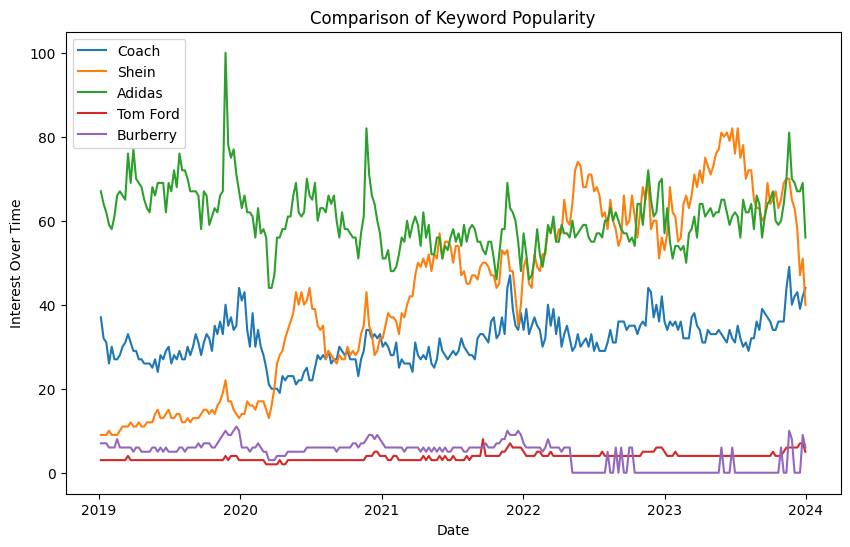

In [381]:
pytrends = TrendReq(hl='en-US', tz=360)
keywords = df_top5['SearchTerm']
pytrends.build_payload(kw_list=keywords)
interest_over_time_df = pytrends.interest_over_time()


# Output
plt.figure(figsize=(10, 6))
for keyword in keywords:
    plt.plot(interest_over_time_df[keyword], label=keyword, linestyle='-', marker=' ')

plt.xlabel('Date')
plt.ylabel('Interest Over Time')
plt.title('Comparison of Keyword Popularity')
plt.legend()

# Display plot
plt.show()

In [382]:
# Limit data to a specific timeframe
years_ago = interest_over_time_df.index[-1] - pd.DateOffset(years=years_shown)
interest_over_time_df = interest_over_time_df[interest_over_time_df.index > years_ago]

# Replace 0 values with NaN
interest_over_time_df.replace(0, np.nan, inplace=True)

# Remove the rightmost column 'isPartial'
interest_over_time_df = interest_over_time_df.iloc[:, :-1]

# Display the limited DataFrame
print('Data frame. Lots of NA possible:\n')
interest_over_time_df.head(5)


Data frame. Lots of NA possible:


<ipython-input-382-755c02e4de90>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interest_over_time_df.replace(0, np.nan, inplace=True)


,Coach,Shein,Adidas,Tom Ford,Burberry
date,,,,,
2022-01-02,34,49,57,5,7.0
2022-01-09,39,51,52,4,6.0
2022-01-16,33,45,46,4,6.0
2022-01-23,35,44,47,4,6.0
2022-01-30,37,52,51,4,6.0


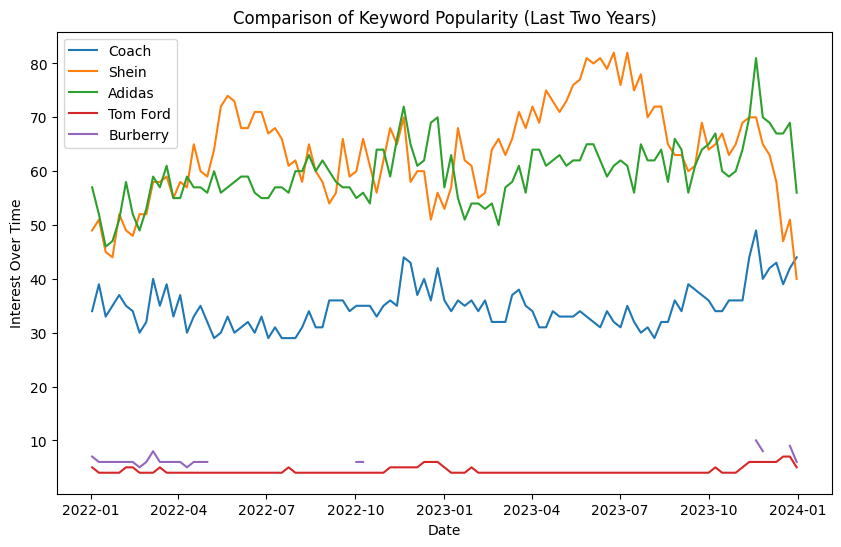

In [383]:
plt.figure(figsize=(10, 6))
for keyword in interest_over_time_df.columns:
    plt.plot(interest_over_time_df.index, np.ma.masked_invalid(interest_over_time_df[keyword]), label=keyword, linestyle='-', marker=' ')

plt.xlabel('Date')
plt.ylabel('Interest Over Time')
plt.title('Comparison of Keyword Popularity (Last Two Years)')
plt.legend()

# Display the plot
plt.show()